<a href="https://colab.research.google.com/github/manaswinit26/assignment2/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling and Exploratory Data Analysis
## I did Q1, Q2, and Q4.
`! git clone https://www.github.com/DS3001/assignment2`

**Q1.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. **Read the abstract. What is this paper about?**
  
  This paper discusses data tidying, an important aspect of data cleaning. It suggests that tidy datasets are easy to manipulate, model, and visualize, and have a specific structure. This structure simplifies dealing with messy datasets and allows for the development of tidy tools for data analysis. The advantages of this structure are demonstrated through a case study.

  2. **Read the introduction. What is the "tidy data standard" intended to accomplish?**
  
  The tidy data standard aims to simplify data exploration and analysis to simplify the creation of efficient data analysis tools.

  3. **Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."**
  
  The first sentence means that tidy datasets have a standardized structure that makes them tidy, but with messy datasets there is no standardization. If it is messy, there are any number of things that are unclear or out of place. The second sentence means that it is only easy to figure out what observations and variables because they are in dataset form. In real life, we can't easily describe an observations, all the variables about them, and the values for each variable, since variables and values are different things.


  4. **Read Section 2.2. How does Wickham define values, variables, and observations?**
  
  A dataset is a collection of values (numbers or strings).Every value belongs to a variable and an observation. A variable contains all values that measure a single attribute across units. An observation contains all values measured on the same unit across attributes.

  5. **How is "Tidy Data" defined in section 2.3?**
  
  Tidy data is a standard way of relating the meaning of a dataset to its structure.  In tidy data: Each variable forms a column, each observation forms a row, and each type of observational unit forms a table.

  6. **Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?**

  These are the 5 most common problems with messy datasets:

  • Column headers are values, not variable names.

  • Multiple variables are stored in one column.

  • Variables are stored in both rows and columns.

  • Multiple types of observational units are stored in the same table.

  • A single observational unit is stored in multiple tables.

  Table 4 is messy because each column is actually a value, not a variable, which in this case should be income. Melting a dataset is essentially turning columns into rows.

  7. **Why, specifically, is table 11 messy but table 12 tidy and "molten"?**

  Table 11 is messy because there is a column for each day in the month when they should really be values for a date column. Table 11 is tidy and molten because now there is one column for data which includes the day. There are also two columns for variables tmax and tmin when previously they were treated as values.

  8. **Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?**

  The chicken-and-egg problem with tidy data is that if tidy data is only as useful as the tools that work with it, then tidy tools will be  linked to tidy data. This means that independently changing data structures or data tools will not improve workflow. Wickham hopes others will build on his framework to develop even better data storage strategies and better tools.



**Q2.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the `./data/sharks.csv` data covered in the lecture, clean the "Type" variable as well as you can, and explain the choices you make.
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

# 1:
To clean the Price variable, I replaced every comma with an empty. This is because commas aren't used in the numeric formatting. Then, I converted the variable from a string to numeric. I did this so the Price variable can be treated as actual numbers. After this, I ended up with 0 missing variables.

After coercion: 
 count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Total Missings: 
 0 



<Axes: >

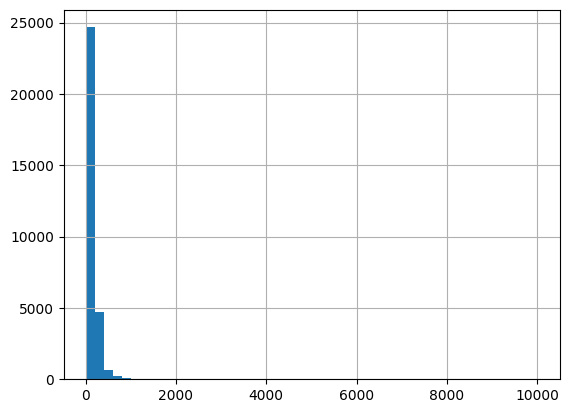

In [93]:
import numpy as np
import pandas as pd
url="https://raw.githubusercontent.com/DS3001/assignment2/main/data/airbnb_hw.csv"
df1 = pd.read_csv(url,low_memory=False)

# remove commas
df1['Price'] = df1['Price'].str.replace(",", "")

# Coerce the variable to numeric
var1 = 'Price'
df1[var1] = pd.to_numeric(df1[var1], errors='coerce')

# How to create a missing value dummy:
df1[var1+'_nan'] = df1[var1].isnull() # Equals 1 if missing, 0 if non-null

# After coercion:
print('After coercion: \n', df1[var1].describe(),'\n') # Describe the numeric variable
print('Total Missings: \n', sum(df1[var1+'_nan']),'\n') # How many missing values are there?

df1[var1].hist(bins = 50) # Histogram of the variable values


# 2:
To clean the dataset, I converted any values that I thought were duplicate and combined them to the same value. For example, there were values called "Boating", "Boat", and "Boatomg", and I replaced all of those into one value called "Boat Related" because they all have the same meaning but have different value counts because they are technically unique values based on the way they are spelled. There was also values called "Unconfirmed", "Unverified", and "Under Investigation", and I thought these values all had similar meanings, so I put them under one value called "Under Investigation". I also replaced any missing values with nan. I made these choices so there aren't too many unneccessary values within a column and it becomes easier to understand and do calculations with the data.


['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Under Investigation'
 'Invalid' 'Boat Related' 'Sea Disaster' nan] 

Unprovoked             4716
Provoked                593
Invalid                 552
Sea Disaster            239
Boat Related            202
Watercraft              142
Questionable             10
Under Investigation       3
Name: Type, dtype: int64 



<Axes: >

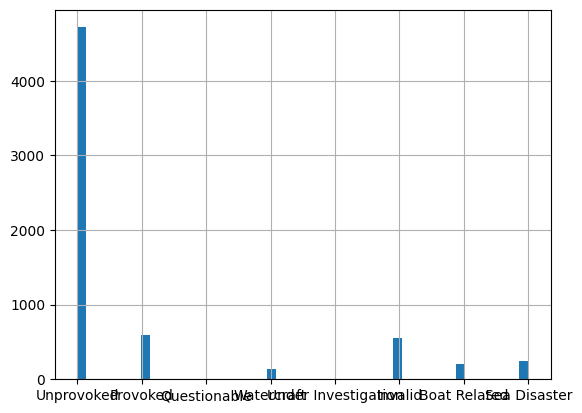

In [94]:
import numpy as np
import pandas as pd
url2="https://raw.githubusercontent.com/DS3001/wrangling/main/data/sharks.csv"
df2 = pd.read_csv(url2,low_memory=False)

var2 = 'Type'
var_conv = {
    'Unprovoked': 'Unprovoked',
    'Provoked' : 'Provoked' ,
    'Questionable': 'Questionable',  # No similar value to combine
    'Watercraft': 'Watercraft',
    'Unconfirmed': 'Under Investigation',
    'Unverified': 'Under Investigation',
    'Invalid': 'Invalid',
    'Under investigation': 'Under Investigation',
    'Boating': 'Boat Related',
    'Sea Disaster': 'Sea Disaster',
    'Boat' : 'Boat Related' ,
    'Boatomg': 'Boat Related'
    # No similar value to combine
}

df2['Type'] = df2['Type'].map(var_conv)

print(df2[var2].unique(), '\n') # A Categorical Example
df2[var2] = df2[var2].replace(' ',np.nan) # Notice the column replacement
print(df2[var2].value_counts(), '\n')
df2[var2].hist(bins = 50) # Histogram of the variable values


# 3:
To clean this dataset, I referred to the Virginia Pretrial codebook. According to this, 9 is the value for "unclear" in the variable. Ireplaced all nan values with 9 so that there are no missing values.

[nan  0.  1.] 

1.0    19154
0.0     3801
9.0       31
Name: released, dtype: int64


<Axes: >

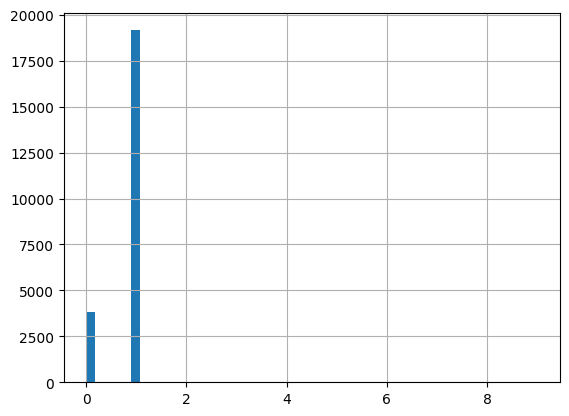

In [3]:
import numpy as np
import pandas as pd
url3="https://raw.githubusercontent.com/DS3001/EDA/main/data/pretrial_data.csv"
df3 = pd.read_csv(url3,low_memory=False)

var3 = 'released'
print(df3[var3].unique(), '\n')
df3[var3] = df3[var3].fillna(9)
print(df3[var3].value_counts()) # value counts


df3[var3].hist(bins = 50) # Histogram of the variable values



# 4.
To clean this dataset, I had to refer to the Virginia Pretrial codebook. I found that the value 9 means "Not applicable (e.g., disposition record not found, or unknown)". So for all nan values in the dataset, I filled it with the integer 9 so that there are no missing values.

[nan  0.  1.  4.  2.] 

4.0    8779
0.0    8720
1.0    4299
2.0     914
9.0     274
Name: sentence_type, dtype: int64


<Axes: >

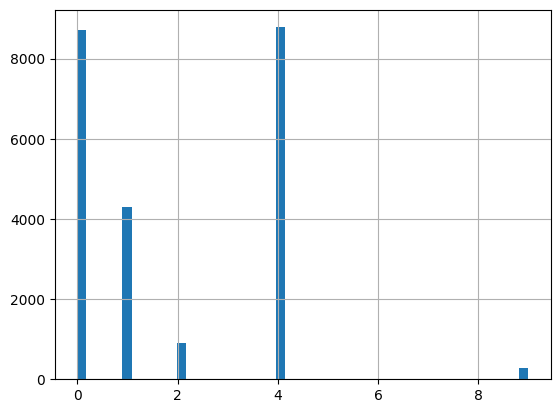

In [4]:
import numpy as np
import pandas as pd
url4="https://raw.githubusercontent.com/DS3001/EDA/main/data/pretrial_data.csv"
df4 = pd.read_csv(url4,low_memory=False)

var4 = 'sentence_type'
print(df4[var4].unique(), '\n')
df4[var4] = df4[var4].fillna(9)
print(df4[var4].value_counts()) # value counts


df4[var4].hist(bins = 50) # Histogram of the variable values

**Q4.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

# 1:


In [5]:
import numpy as np
import pandas as pd
url="https://raw.githubusercontent.com/DS3001/assignment2/main/data/airbnb_hw.csv"
df = pd.read_csv(url,low_memory=False)

# remove commas
df['Price'] = df['Price'].str.replace(",", "")

# Coerce the variable to numeric
var = 'Price'
df[var] = pd.to_numeric(df[var], errors='coerce')

# How to create a missing value dummy:
df[var+'_nan'] = df[var].isnull() # Equals 1 if missing, 0 if non-null

# 2:
There are 30,478 observations. There are 14 variables.

In [6]:
print(df.shape, '\n')
print(df.dtypes, '\n')
print(df.head())

(30478, 14) 

Host Id                         int64
Host Since                     object
Name                           object
Neighbourhood                  object
Property Type                  object
Review Scores Rating (bin)    float64
Room Type                      object
Zipcode                       float64
Beds                          float64
Number of Records               int64
Number Of Reviews               int64
Price                           int64
Review Scores Rating          float64
Price_nan                        bool
dtype: object 

    Host Id Host Since                                Name Neighbourhood   \
0   5162530        NaN     1 Bedroom in Prime Williamsburg       Brooklyn   
1  33134899        NaN     Sunny, Private room in Bushwick       Brooklyn   
2  39608626        NaN                Sunny Room in Harlem      Manhattan   
3       500  6/26/2008  Gorgeous 1 BR with Private Balcony      Manhattan   
4       500  6/26/2008            Trendy Times Square

# 3:
Majority of property types available are apartments, houses, and lofts. Out of the room types, entire homes/apts and private rooms are most popular. Bed and Breakfasts, Castles, Chalets, dorms, houses, huts, tents, treehouses, and others all have more private rooms than entire homes/apts. However, the only property types where this is noticable different are bed and breakfasts, dorms, houses and others.

In [9]:
pd.crosstab(df['Room Type'], df['Property Type'], margins=True, margins_name="Total")

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa,Total
Room Type,,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4,17022
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4,12608
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0,845
Total,27102,180,8,4,2,7,1,1,94,31,2090,2,1,753,47,4,136,4,8,30475


# 4:
Before transforming, the data are badly scaled. The min is 10 and the max is 10,000, however the median is only 125 which means the data is scaled closer to the minimum. In the histogram, most values are falling within 0 to 2,000. There are not much outliers other than 10,000.

<Axes: >

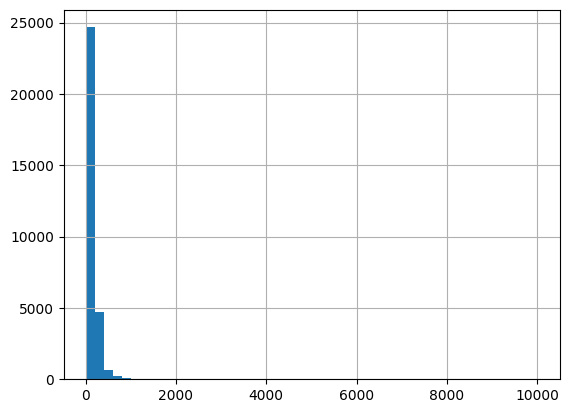

In [18]:
# histogram
df['Price'].hist(bins=50)

<Axes: ylabel='Density'>

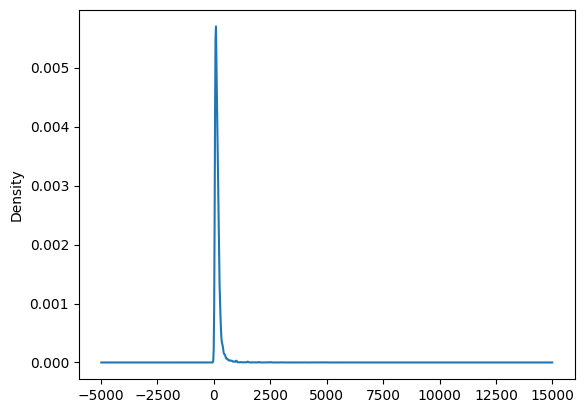

In [16]:
# kernel density plot
df['Price'].plot.density()

In [17]:
# statistical description
descr1 = df['Price'].describe() # Save the description as an object
print(descr1,'\n')

# Computing the Variance:
std1 = descr1[2] # Accessing the standard deviation from the description object
var1 = std1**2
print('Variance: ', var1,'\n')

# Computing the IQR:
thirdQ1 = descr1[6] # Getting the 75% percentile
firstQ1 = descr1[4] # Getting the 25% percentile
IQR1 = thirdQ1 - firstQ1 # Computing the IQR
print('IQR: ', IQR1)

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64 

Variance:  39119.085673448484 

IQR:  115.0


In [19]:
# transformed variable
df['price_log'] = np.log(df['Price'])

<Axes: >

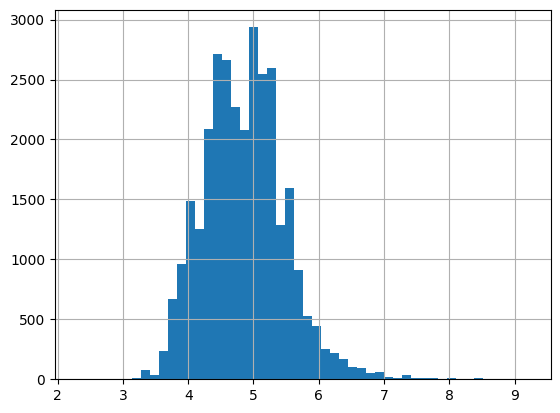

In [20]:
# transformed histogram
df['price_log'].hist(bins=50)

<Axes: ylabel='Density'>

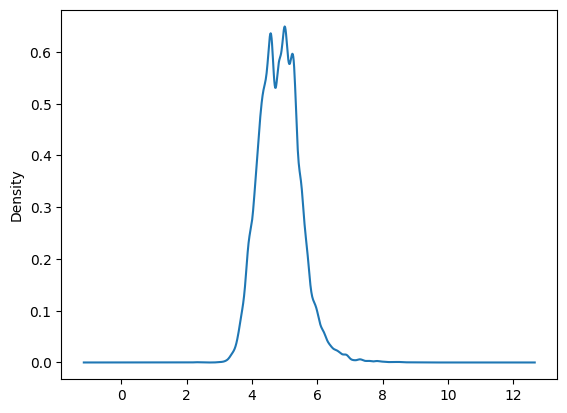

In [21]:
# transformed kernel density plot
df['price_log'].plot.density()

In [22]:
# transformed statistical description
descr2 = df['price_log'].describe() # Save the description as an object
print(descr2,'\n')

# Computing the Variance:
std2 = descr2[2] # Accessing the standard deviation from the description object
var2 = std2**2
print('Variance: ', var2,'\n')

# Computing the IQR:
thirdQ2 = descr2[6] # Getting the 75% percentile
firstQ2 = descr2[4] # Getting the 25% percentile
IQR2 = thirdQ2 - firstQ2 # Computing the IQR
print('IQR: ', IQR2)

count    30478.000000
mean         4.860495
std          0.627704
min          2.302585
25%          4.382027
50%          4.828314
75%          5.273000
max          9.210340
Name: price_log, dtype: float64 

Variance:  0.39401233246166956 

IQR:  0.8909729238898656


# 5:
The highest occurences of beds is within 1 to 6. After 6 beds, there are less rentals. The range of prices falls between around 3 to 8 for all bed numbers. As the number of beds increase, this range starts to decrease to around 4 to 7 for price. For the most part, average price increases as the number of beds increase. There are some exceptions, like rentals with 7, 10,11, and 16 beds, but there does seem to be an overall pattern. There is not as much of a patten with standard deviation. Standard deviation does increase like average price up until 5 bedrooms. After that, it decreases or increases regardless of average price increasing or decreasing.

<Axes: xlabel='Beds', ylabel='price_log'>

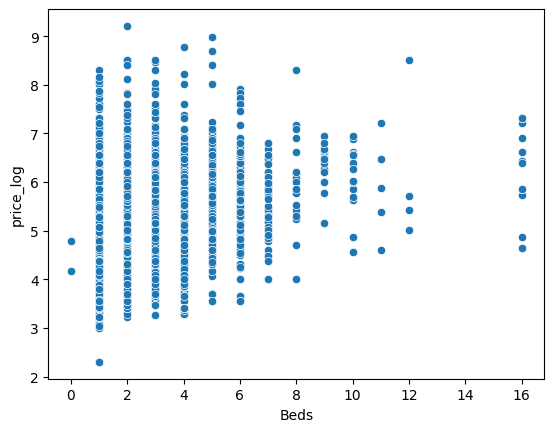

In [24]:
import seaborn as sns
sns.scatterplot(x='Beds', y='price_log', data=df)

In [25]:
df.groupby('Beds')['Price'].describe()

,count,mean,std,min,25%,50%,75%,max
Beds,,,,,,,,
0.0,2.0,92.000000,38.183766,65.0,78.50,92.0,105.50,119.0
1.0,20344.0,127.673810,107.047827,10.0,75.00,100.0,155.00,4000.0
2.0,6610.0,199.061271,225.706318,25.0,115.00,160.0,225.00,10000.0
3.0,2071.0,268.118300,303.106942,26.0,140.00,200.0,300.00,5000.0
4.0,783.0,315.332056,353.184402,27.0,150.00,247.0,375.00,6500.0
5.0,284.0,411.500000,672.610659,35.0,189.75,290.0,450.00,8000.0
6.0,177.0,401.768362,417.018431,35.0,199.00,275.0,425.00,2750.0
7.0,45.0,341.377778,220.116631,55.0,177.00,300.0,445.00,900.0
8.0,24.0,589.041667,793.054934,55.0,243.75,350.0,481.25,4000.0


#6:

From all room types, entire home/apt is most common. Private rooms and shared rooms most commonly have 1 to 4 beds. Apartments are the most common property type until around 8 bedroom.s After this, houses become much more common. Private rooms tend to be lower priced than entire home/apts, and shared rooms are often priced lowest. Room types of entire home/apt in property types of Other, Villa, and House have the top 3 highest average prices and standard deviations. Median seems to be a more reliable estimate of central tendency because they don't vary as much wiithin the description output. In general, medians are also not impacted by outliers.

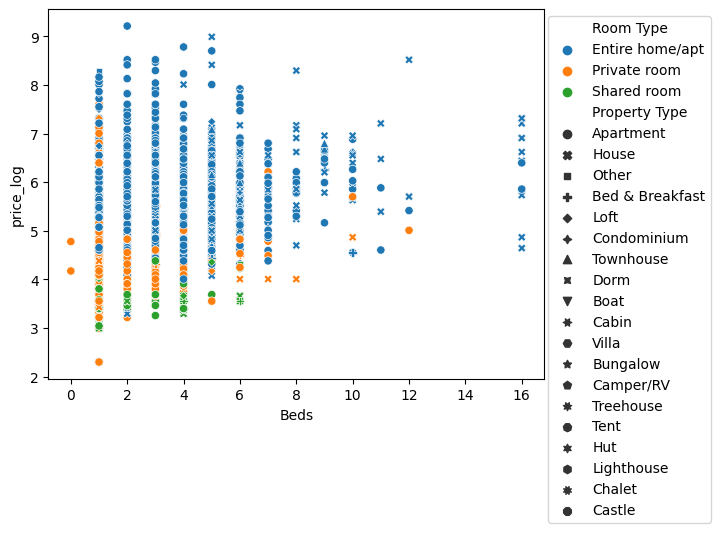

In [28]:
plot = sns.scatterplot(x='Beds', y='price_log', hue='Room Type', style='Property Type', data=df)
sns.move_legend(plot, "upper right", bbox_to_anchor=(1.35, 1))


In [29]:
df.groupby(['Room Type', 'Property Type'])['Price'].describe()

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0  150.750000    46.464144   87.0   
                Cabin                1.0  250.000000          NaN  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0   44.250000    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0   39.000000          NaN   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0  529.750000   650.963581  120.0   
Private room    Apartment        10748.0   92.713900    65.237050   10.0   
                Bed & Breakfast    155.0   97.161290    47.031971   32.0   
                Boat                 1.0  120.000000          NaN  120.0   
                Cabin                1.0   80.000000          NaN   80.0   
                Camper/RV            1.0   39.000000          NaN   39.0   
                Castle               1.0  150.000000          NaN  150.0   
                Chalet               1.0   99.000000          NaN   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0   86.562500    40.738137   50.0   
                House             1258.0   77.750397    49.402650   25.0   
                Hut                  2.0   75.000000    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0  126.250000    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0   95.000000          NaN   95.0   
                Villa                4.0  126.250000    71.107313   60.0   
Shared room     Apartment          685.0   79.200000    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0   77.487500   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0  148.750000   134.806961   70.0   
                Townhouse            1.0   95.000000          NaN   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                    25%    50%      75%      max  
Room Type       Property Type                                     
Entire home/apt Apartment        135.00  175.0   235.00  10000.0  
                Bed & Breakfast  121.00  130.0   220.00    525.0  
                Boat             122.50  150.0   182.00    250.0  
                Bungalow         133.50  160.5   177.75    195.0  
                Cabin            250.00  250.0   250.00    250.0  
                Camper/RV         49.00   74.0   114.00    325.0  
                Condominium      155.00  200.0   375.00   1990.0  
                Dorm              30.00   33.5    47.75     80.0  
                House            126.50  195.0   300.00   8000.0  
                Lighthouse        39.00   39.0    39.00     39.0  
                Loft             160.00  225.0   379.00   3000.0  
                Other            140.00  300.0 

# 7:

For beds, data is distributed from 1 to 4. For price, data is distributed 3 to 7. Jointly, it looks like most rentals range from 1 to 3 beds at a price of 3.5 to 6. This changes how I look at 5 and 6 because in those scatterplots, it looks like there are a good number of rentals with more than 4 bedrooms and the price had a much wider range. This shows how the data is actually distributed and not just how many points of each there are.

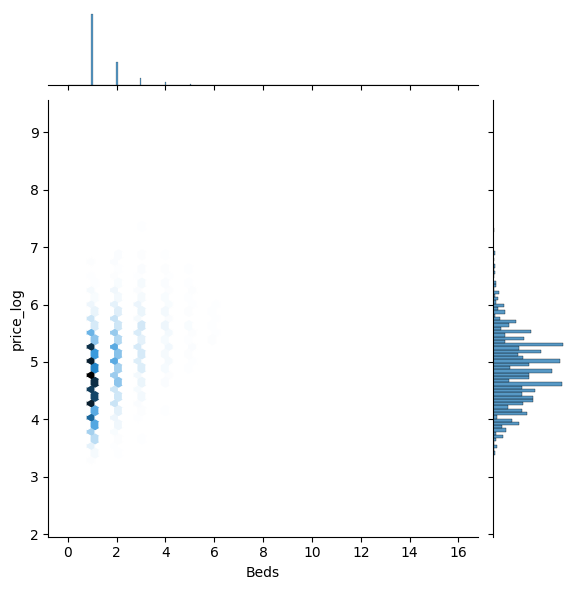

In [30]:
sns.jointplot(x='Beds',y='price_log',data=df,kind='hex')